In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ts = pd.Series([3,3,2,2,3,3,4,4,4,4], index=pd.date_range('1/1/2000', periods=10))
ts[:5]

2000-01-01    3
2000-01-02    3
2000-01-03    2
2000-01-04    2
2000-01-05    3
Freq: D, dtype: int64

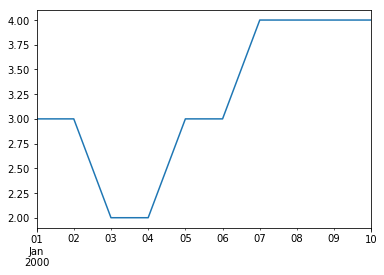

In [25]:
ts.plot()

In [30]:
df = pd.DataFrame(index=ts.index)
df["Today"] = [1,1,0,0,1,1,1,1,1,1]
df["Volume"] = [0,0,0,0,0,0,1,1,1,1]
df['Sum'] = ts.values
df.head(10)

,Today,Volume,Sum
2000-01-01,1,0,3
2000-01-02,1,0,3
2000-01-03,0,0,2
2000-01-04,0,0,2
2000-01-05,1,0,3
2000-01-06,1,0,3
2000-01-07,1,1,4
2000-01-08,1,1,4
2000-01-09,1,1,4
2000-01-10,1,1,4


In [31]:
y = df['Sum']
X = df[["Today","Volume"]]

In [34]:
def eval_on_features(features, target, regressor):
    n_train = 8
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]  
    regressor.fit(X_train, y_train)
    print("Testdatensatz R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="Training")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="Test")
    plt.plot(range(n_train), y_pred_train, '--', label="Vorhersage Training")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="Vorhersage Test")
    
    plt.legend(loc=(1.01,0))
    plt.xlabel("Datum")
    plt.ylabel("Vermietungen")

Testdatensatz R^2: 0.00


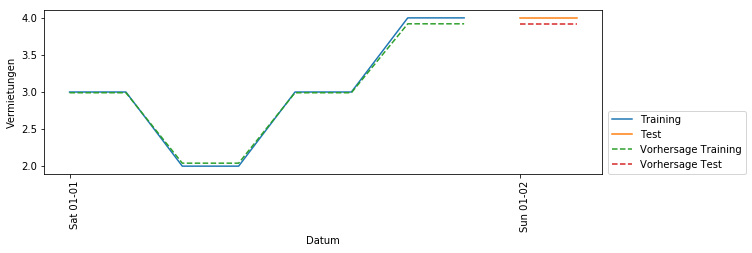

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
eval_on_features(X, y, regressor)